In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')

In [2]:
df = df[['sex', 'survived', 'age']].dropna()

In [3]:
survived_men = df[(df['sex'] == 'male') & (df['survived'] == 1)]['age']
died_men = df[(df['sex'] == 'male') & (df['survived'] == 0)]['age']
survived_women = df[(df['sex'] == 'female') & (df['survived'] == 1)]['age']
died_women = df[(df['sex'] == 'female') & (df['survived'] == 0)]['age']

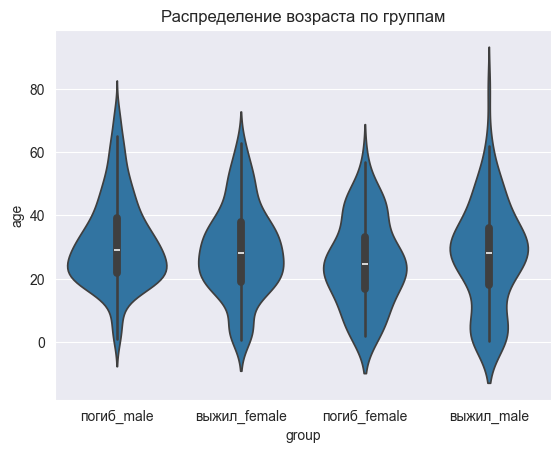

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df['group'] = df.apply(lambda row: f"{'выжил' if row['survived'] == 1 else 'погиб'}_{row['sex']}", axis=1)

sns.violinplot(data=df, x='group', y='age')
plt.title("Распределение возраста по группам")
plt.show()

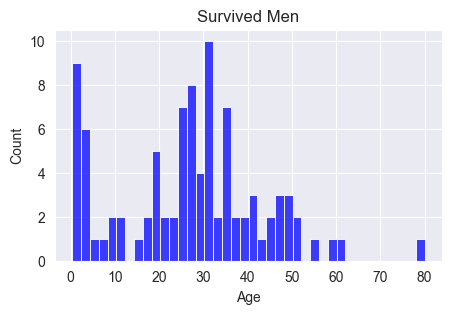

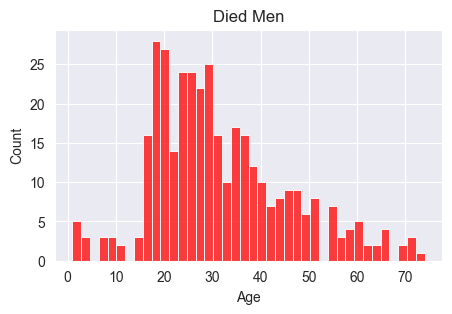

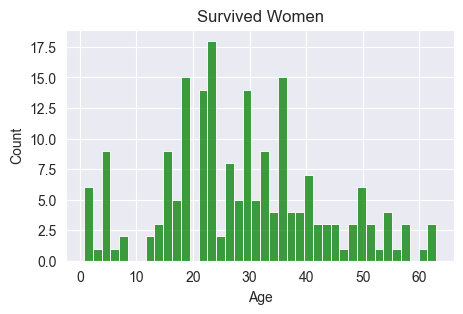

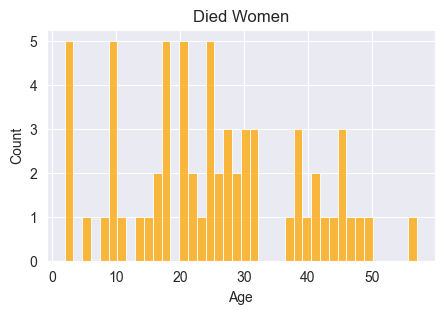

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
sns.histplot(survived_men.dropna(), bins=40, kde=False, color='blue')
plt.title('Survived Men')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(died_men.dropna(), bins=40, kde=False, color='red')
plt.title('Died Men')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(survived_women.dropna(), bins=40, kde=False, color='green')
plt.title('Survived Women')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(died_women.dropna(), bins=40, kde=False, color='orange')
plt.title('Died Women')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [6]:
from scipy.stats import shapiro

print(shapiro(survived_men))
print(shapiro(died_men))
print(shapiro(survived_women))
print(shapiro(died_women))

ShapiroResult(statistic=np.float64(0.9621221048383921), pvalue=np.float64(0.008520757320158327))
ShapiroResult(statistic=np.float64(0.9593108698664704), pvalue=np.float64(1.9237240800991812e-08))
ShapiroResult(statistic=np.float64(0.982794952790589), pvalue=np.float64(0.016299960472636068))
ShapiroResult(statistic=np.float64(0.9739143202294547), pvalue=np.float64(0.19278683300928573))


In [7]:
from scipy.stats import kruskal

stat, p = kruskal(survived_men, died_men, survived_women, died_women)
print(f"Kruskal-Wallis H-test: statistic={stat}, p-value={p}")

Kruskal-Wallis H-test: statistic=11.363775932401305, p-value=0.009912982694038307


In [8]:
from scipy.stats import skew, kurtosis

samples = {
    'Survived Men': survived_men.dropna(),
    'Died Men': died_men.dropna(),
    'Survived Women': survived_women.dropna(),
    'Died Women': died_women.dropna()
}

for name, data in samples.items():
    asym = skew(data)
    exc = kurtosis(data)  # эксцесс по умолчанию — "excess kurtosis" (от нормального распределения отнимаем 3)
    print(f"{name}:\n  Ассиметрия (skewness): {asym:.4f}\n  Эксцесс (kurtosis): {exc:.4f}\n")

Survived Men:
  Ассиметрия (skewness): 0.1988
  Эксцесс (kurtosis): 0.0404

Died Men:
  Ассиметрия (skewness): 0.6709
  Эксцесс (kurtosis): 0.2897

Survived Women:
  Ассиметрия (skewness): 0.2013
  Эксцесс (kurtosis): -0.2796

Died Women:
  Ассиметрия (skewness): 0.1842
  Эксцесс (kurtosis): -0.6800



Вывод

- **Survived Men:** p-value = 0.0085 < 0.05 — распределение статистически отличается от нормального.
- **Died Men:** p-value ≈ 1.92e-08 < 0.05 — распределение явно не нормальное.
- **Survived Women:** p-value = 0.0163 < 0.05 — также отклоняется от нормальности.
- **Died Women:** p-value = 0.193 > 0.05 — нет оснований отвергать гипотезу нормальности.



| Группа          | Асимметрия (skewness) | Эксцесс (kurtosis) | Вывод о форме распределения               |
|-----------------|-----------------------|--------------------|--------------------------------------------|
| Survived Men    | 0.1988 (слабая вправо) | 0.0404 (почти норм.)| Практически симметрично, но тест показал отклонение от нормальности, возможно из-за больших данных или выбросов |
| Died Men        | 0.6709 (умеренный сдвиг вправо) | 0.2897 (слегка более острое) | Скошено вправо, распределение не нормальное |
| Survived Women  | 0.2013 (слабая вправо) | -0.2796 (более плоское) | Почти симметричное, но с небольшой плоскостью, тест показал отклонение от нормальности |
| Died Women      | 0.1842 (слабая вправо) | -0.6800 (выраженно плоское) | Наименее скошено и наиболее похоже на нормальное распределение |

